<a href="https://colab.research.google.com/github/gapalacic/Classical_Orthogonal_Polynomials/blob/master/orthogonal_polynomials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Uncoment to proceed with the installation
#!pip install numpy
#!pip install pandas
#!pip install scipy
#!pip install Pillow
#!pip install mpmath
#!pip install numba
#!pip install rise
#!pip install sympy
#!pip install matplotlib

In [2]:
import numpy as np
import sympy as sp
from sympy import oo
from sympy.plotting import plot 

- Plotting the Hermite polynomial $H_n(w)$, with $n=2$ and $w=2x+xy$

---



In [3]:
x, y, z, w, k = sp.symbols('x,y,z,w,k')
sp.hermite(2,2*x+x*y)

4*(x*y + 2*x)**2 - 2

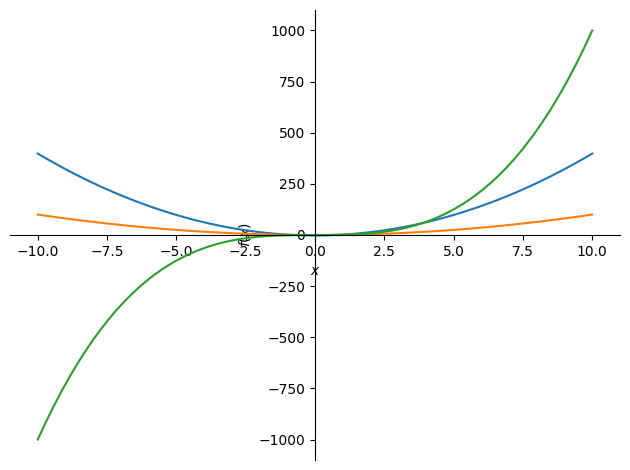

In [4]:
# Plotting example for three given functions, including the hermite polynomials
plot(sp.hermite(2,x),x**2, x**3)

## Inner product in the Hermite basis 
$<H_i(x)|H_j(x)> =  \displaystyle \int_{-∞}^{\infty} w(x)H_i(x)H_j(x)dx $

In [5]:
def inner_product_hermite(i,j):
  ''' Inner product def. for hermite polynomials
  input:
  i:--> degree of first hermite polynomial
  j:--> degree of second hermite polynomial
  output:
  inner product between H(i,x) and H(j,n) 
  '''
  w = sp.exp(-x**2)
  f = sp.hermite(i,x)
  g = sp.hermite(j,x)
  h = sp.integrate(w*f*g,(x,-sp.oo,sp.oo))
  return h

## Expansion of $f(x)$ in the Hermite basis:
$$f(x)= \sum_{n=0}^{∞}  c_n H_n(x), \quad H_n(x) = (-1^{n} ) $$
## with the coefficients $C_n$ given by:

$$C_n = \dfrac{<H_n(x)|f(x)>}{<H_n(x)|H_n(x)>} =  \dfrac{\displaystyle \int_{-∞}^{\infty} w(x)H_n(x)f(x)dx}{ \displaystyle \int_{-∞}^{\infty} w(x)H_n(x)H_n(x)dx}, \quad w(x)=e^{-x^2} $$

In [6]:
def poli_expan_hermite(f,x,n):
  '''Expansion of function f(x) in polynomical basis: Hermite case 
  Input:
  f(x):--> funtion to expand.
  x:--> f(x)'s argument.
  n:--> expansion's order 
  Output:
  Expansion of f(x) at order n
  '''
# wight function
  w = sp.exp(-x**2)
  #print (w)
  z = 0
  o = 0
  for i in range(0,n):
    h = sp.hermite(i,x)
    #g = sp.hermite(j,x)
    # normalization
    norm = sp.integrate(w*h*h,(x,-sp.oo,sp.oo))
    # integration
    int_ = sp.integrate(w*f*h,(x,-sp.oo,sp.oo))
    coeff = int_/norm
    #z = coeff*sp.hermite(i,x)
    z+= sp.Add(coeff*sp.hermite(i,x))
    print ("i=",i,"z=",z)
    #print (norm, int_, coeff, w) 
  return z

## Expansion of $f(x)$ in the Laguerre basis:
$$f(x)= \sum_{n=0}^{∞}  c_n L^{\nu}_n(x), \quad \nu=0, \quad w(x)=e^{-x} $$
## with the coefficients $C_n$ given by:

$$C_n = \dfrac{<L_n(x)|f(x)>}{<L_n(x)|L_n(x)>} =  \dfrac{\displaystyle \int_{0}^{\infty} w(x)L_n(x)f(x)dx}{ \displaystyle \int_{0}^{\infty} w(x)L_n(x)L_n(x)dx} $$

In [7]:
def poli_expan_laguerre(f,x,n):
  '''Expansion of function f(x) in polynomical basis: Laguerre case 
    Input:
    f(x):--> funtion to expand.
    x:--> f(x)'s argument.
    n:--> expansion's order 
    Output:
    Expansion of f(x) at order n
  '''
  # wight function
  w = sp.exp(-x)
  #print (w)
  z = 0
  o = 0
  for i in range(0,n):
    h = sp.laguerre(i,x)
    norm = sp.integrate(w*h*h,(x,0,sp.oo))
    int_ = sp.integrate(w*f*h,(x,0,sp.oo))
    coeff = int_/norm
    z+= sp.Add(coeff*sp.laguerre(i,x))
    print ("i=",i,"z=",z)
    #print (norm, int_, coeff, w) 
  return z

## Expansion of $f(x)$ in the Jacobi basis:
$$f(x)= \sum_{n=0}^{∞}  c_n J^{\mu, ~\nu}_n(x), \quad \nu=0, \quad w(x)=(1-x)^{\mu}(1+x)^{\nu} $$
## with the coefficients $C_n$ given by:

$$C_n = \dfrac{<J^{\mu, ~\nu}_n(x)|f(x)>}{<J^{\mu, ~\nu}_n(x)|J^{\mu, ~\nu}_n(x)>} =  \dfrac{\displaystyle \int_{-1}^{1} w(x)J^{\mu, ~\nu}_n(x)f(x)dx}{ \displaystyle \int_{-1}^{1} w(x)J^{\mu, ~\nu}_n(x)J^{\mu, ~\nu}_n(x) dx} $$

In [8]:
def poli_expan_jacobi(f,x,a,b,n):
  '''Expansion of function f(x) in polynomical basis: Jacobi case 
    Input:
    f(x):--> funtion to expand.
    x:--> f(x)'s argument.
    a:--> \mu parameter
    b:--> \nu parameter
    n:--> expansion's order 
    Output:
    Expansion of f(x) at order n
  '''
  # wight function
  w = (1-x)**a*(1+x)**b
  #print (w)
  z = 0
  o = 0
  for i in range(0,n):
    h = sp.jacobi(i,a,b,x)
    norm = sp.integrate(w*h*h,(x,-1,1))
    int_ = sp.integrate(w*f*h,(x,-1,1))
    coeff = int_/norm
    z+= sp.Add(coeff*sp.jacobi(i,a,b,x))
    print ("i=",i,"z=",z)
    #print (norm, int_, coeff, w) 
  return z

In [9]:
def f(x):
  '''Function example '''
  #f = x**20+5*x**15+6*x**9
  f = sp.exp(-x**2)
  #f = sp.exp(-x**2)
  #f = sp.exp(-x**10)
  return f

In [10]:
f(x)

exp(-x**2)

# Expansion of the function f(x)

In [11]:
%%time
a = 1
b = 1 
n_max = 5
print("Expansion in hermite basis")
z_1 = poli_expan_hermite(f(x),x,n_max)
print("Expansion in laguerre basis")
z_2 = poli_expan_laguerre(f(x),x,n_max)
print("Expansion in jacobi basis")
z_3 = poli_expan_jacobi(f(x),x,a,b,n_max)

Expansion in hermite basis
i= 0 z= sqrt(2)/2
i= 1 z= sqrt(2)/2
i= 2 z= -sqrt(2)*(4*x**2 - 2)/16 + sqrt(2)/2
i= 3 z= -sqrt(2)*(4*x**2 - 2)/16 + sqrt(2)/2
i= 4 z= -sqrt(2)*(4*x**2 - 2)/16 + sqrt(2)*(16*x**4 - 48*x**2 + 12)/256 + sqrt(2)/2
Expansion in laguerre basis
i= 0 z= sqrt(pi)*exp(1/4)*erfc(1/2)/2
i= 1 z= (1 - x)*(-(-sqrt(pi)*erfc(1/2)/2 + exp(-1/4))*exp(1/4)/2 + sqrt(pi)*exp(1/4)*erfc(1/2)/2) + sqrt(pi)*exp(1/4)*erfc(1/2)/2
i= 2 z= (1 - x)*(-(-sqrt(pi)*erfc(1/2)/2 + exp(-1/4))*exp(1/4)/2 + sqrt(pi)*exp(1/4)*erfc(1/2)/2) + (x**2/2 - 2*x + 1)*(-(-sqrt(pi)*erfc(1/2)/2 + exp(-1/4))*exp(1/4) + (sqrt(pi)*(-3*exp(-1/4)/2 + 3*sqrt(pi)*erfc(1/2)/4)*exp(1/4) + sqrt(pi))/(4*sqrt(pi)) + sqrt(pi)*exp(1/4)*erfc(1/2)/2) + sqrt(pi)*exp(1/4)*erfc(1/2)/2
i= 3 z= (1 - x)*(-(-sqrt(pi)*erfc(1/2)/2 + exp(-1/4))*exp(1/4)/2 + sqrt(pi)*exp(1/4)*erfc(1/2)/2) + (x**2/2 - 2*x + 1)*(-(-sqrt(pi)*erfc(1/2)/2 + exp(-1/4))*exp(1/4) + (sqrt(pi)*(-3*exp(-1/4)/2 + 3*sqrt(pi)*erfc(1/2)/4)*exp(1/4) + sqrt(pi))/(4*sqrt

In [12]:
# printing the approximations
print(z_1,z_2,z_3)


-sqrt(2)*(4*x**2 - 2)/16 + sqrt(2)*(16*x**4 - 48*x**2 + 12)/256 + sqrt(2)/2 (1 - x)*(-(-sqrt(pi)*erfc(1/2)/2 + exp(-1/4))*exp(1/4)/2 + sqrt(pi)*exp(1/4)*erfc(1/2)/2) + (x**2/2 - 2*x + 1)*(-(-sqrt(pi)*erfc(1/2)/2 + exp(-1/4))*exp(1/4) + (sqrt(pi)*(-3*exp(-1/4)/2 + 3*sqrt(pi)*erfc(1/2)/4)*exp(1/4) + sqrt(pi))/(4*sqrt(pi)) + sqrt(pi)*exp(1/4)*erfc(1/2)/2) + (-x**3/6 + 3*x**2/2 - 3*x + 1)*(-3*(-sqrt(pi)*erfc(1/2)/2 + exp(-1/4))*exp(1/4)/2 - (sqrt(pi)*(-7*exp(-1/4)/4 - 7*sqrt(pi)*erfc(1/2)/8)*exp(1/4) + 3*sqrt(pi))/(12*sqrt(pi)) + 3*(sqrt(pi)*(-3*exp(-1/4)/2 + 3*sqrt(pi)*erfc(1/2)/4)*exp(1/4) + sqrt(pi))/(4*sqrt(pi)) + sqrt(pi)*exp(1/4)*erfc(1/2)/2) + (x**4/24 - 2*x**3/3 + 3*x**2 - 4*x + 1)*(-2*(-sqrt(pi)*erfc(1/2)/2 + exp(-1/4))*exp(1/4) - (sqrt(pi)*(-7*exp(-1/4)/4 - 7*sqrt(pi)*erfc(1/2)/8)*exp(1/4) + 3*sqrt(pi))/(3*sqrt(pi)) + (-9*sqrt(pi)/2 + sqrt(pi)*(25*sqrt(pi)*erfc(1/2)/16 + 25*exp(-1/4)/8)*exp(1/4))/(48*sqrt(pi)) + 3*(sqrt(pi)*(-3*exp(-1/4)/2 + 3*sqrt(pi)*erfc(1/2)/4)*exp(1/4) + sqr

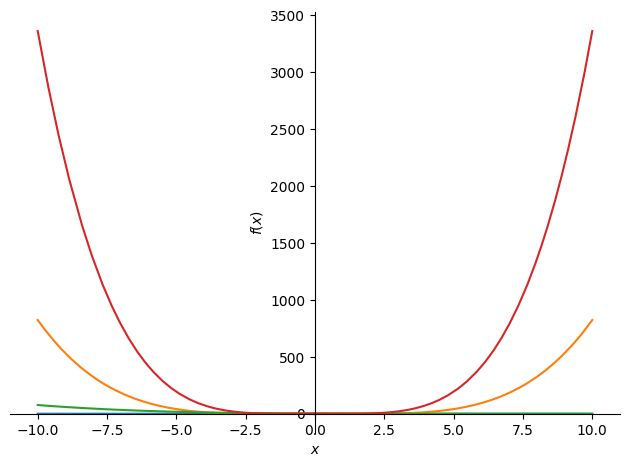

In [13]:
plot(f(x),z_1,z_2,z_3)